<a href="https://colab.research.google.com/github/Hemanthjkumar/EDA-DA/blob/main/EDA_MOD_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE 5: CLUSTERING ALGORITHMS**

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/HepatitisCdata.csv'
data = pd.read_csv(url)

# Selecting relevant numerical columns for clustering
numerical_columns = ['ALT', 'AST', 'BIL', 'ALB', 'ALP', 'PROT']

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# Convert scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Display the first few rows
scaled_df.head()


,ALT,AST,BIL,ALB,ALP,PROT
0,-0.815390,-0.383693,-0.198236,-0.540208,-0.606922,-0.563913
1,-0.410658,-0.305057,-0.381375,-0.540208,0.077522,0.825430
2,0.304499,0.538767,-0.269457,0.914106,0.246711,1.344118
3,0.084451,-0.368571,0.381706,0.273516,-0.626148,0.677233
4,0.163040,-0.302033,-0.091404,-0.419015,0.223639,-0.619487


# Using the elbow method to find the optimal number of clusters

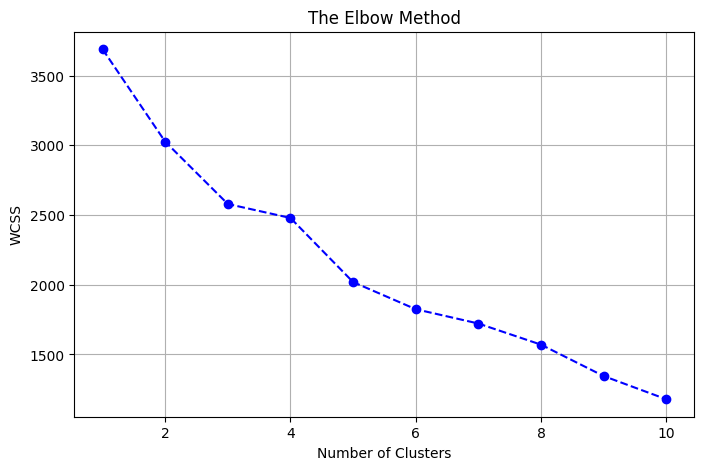

In [6]:
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
data[numerical_columns] = imputer.fit_transform(data[numerical_columns]) # Impute missing values

# Standardizing the dataset
scaler = StandardScaler()
X = scaler.fit_transform(data[numerical_columns])  # Define X correctly

# Applying the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS (Within-Cluster Sum of Squares)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Training the K-Means model on the dataset

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

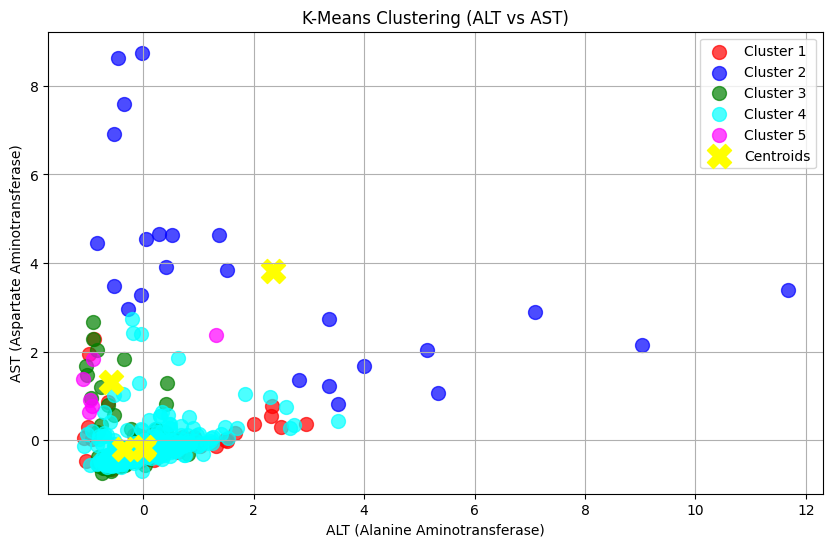

In [9]:
import matplotlib.pyplot as plt

# Scatter plot for each cluster
plt.figure(figsize=(10, 6))
for i, color, label in zip(range(5), ['red', 'blue', 'green', 'cyan', 'magenta'],
                           ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=100, c=color, label=label, alpha=0.7)

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='X', label='Centroids')

# Plot settings
plt.title('K-Means Clustering (ALT vs AST)')
plt.xlabel('ALT (Alanine Aminotransferase)')
plt.ylabel('AST (Aspartate Aminotransferase)')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

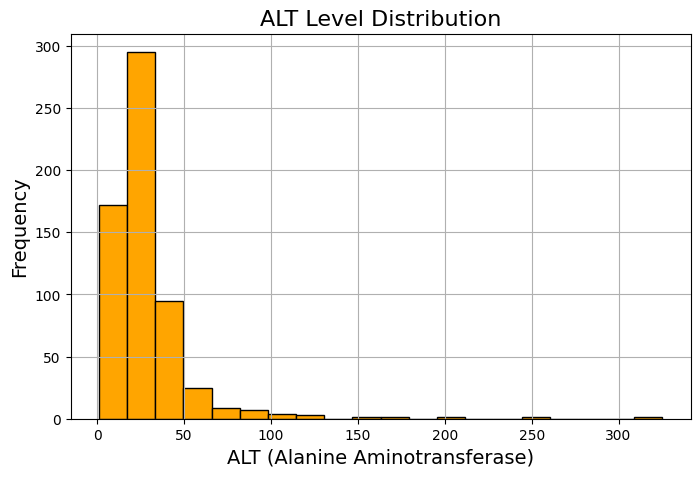

In [11]:
plt.figure(figsize=(8, 5))
plt.title("ALT Level Distribution", fontsize=16)
plt.xlabel("ALT (Alanine Aminotransferase)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)

# Histogram for ALT levels
plt.hist(data['ALT'], color='orange', edgecolor='k', bins=20)

plt.show()

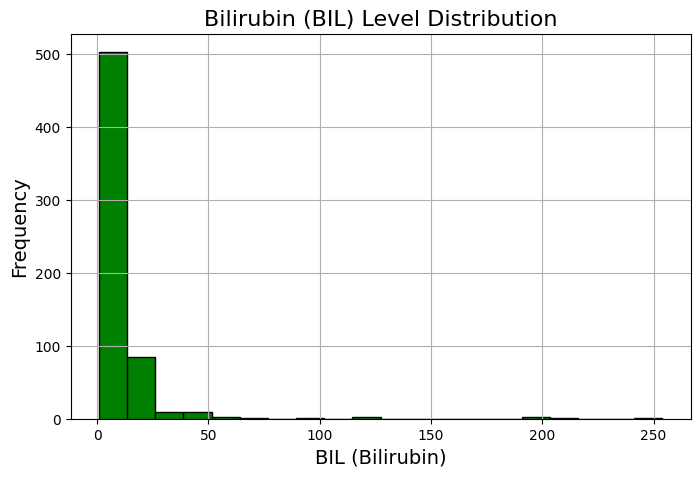

In [12]:
plt.figure(figsize=(8, 5))
plt.title("Bilirubin (BIL) Level Distribution", fontsize=16)
plt.xlabel("BIL (Bilirubin)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)

# Histogram for Bilirubin levels
plt.hist(data['BIL'], color='green', edgecolor='k', bins=20)

plt.show()

# Dendograms

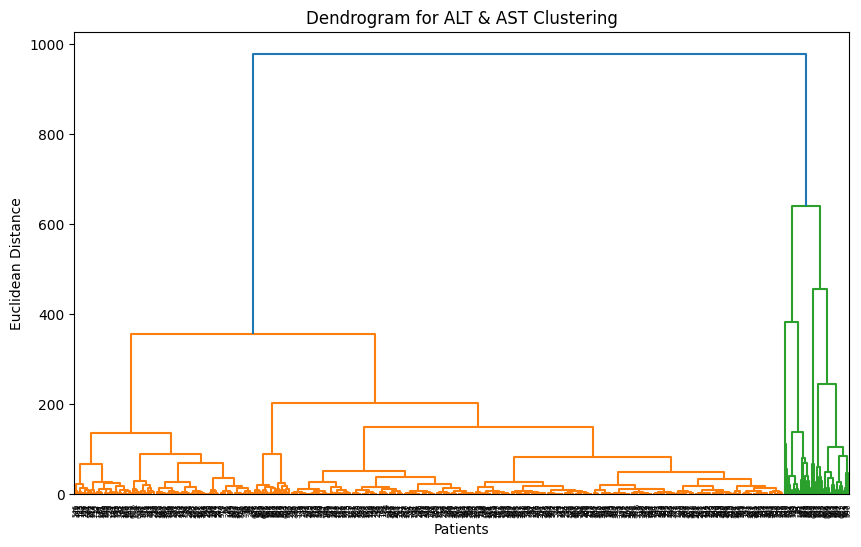

In [15]:
#Dendograms
import scipy.cluster.hierarchy as sch  #
import matplotlib.pyplot as plt

# Selecting ALT and AST for clustering
X = data[['ALT', 'AST']].values

# Creating the dendrogram
plt.figure(figsize=(10, 6))
plt.title('Dendrogram for ALT & AST Clustering')
plt.xlabel('Patients')
plt.ylabel('Euclidean Distance')

# Using Ward’s method for hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.show()

# Optimal number of clusters

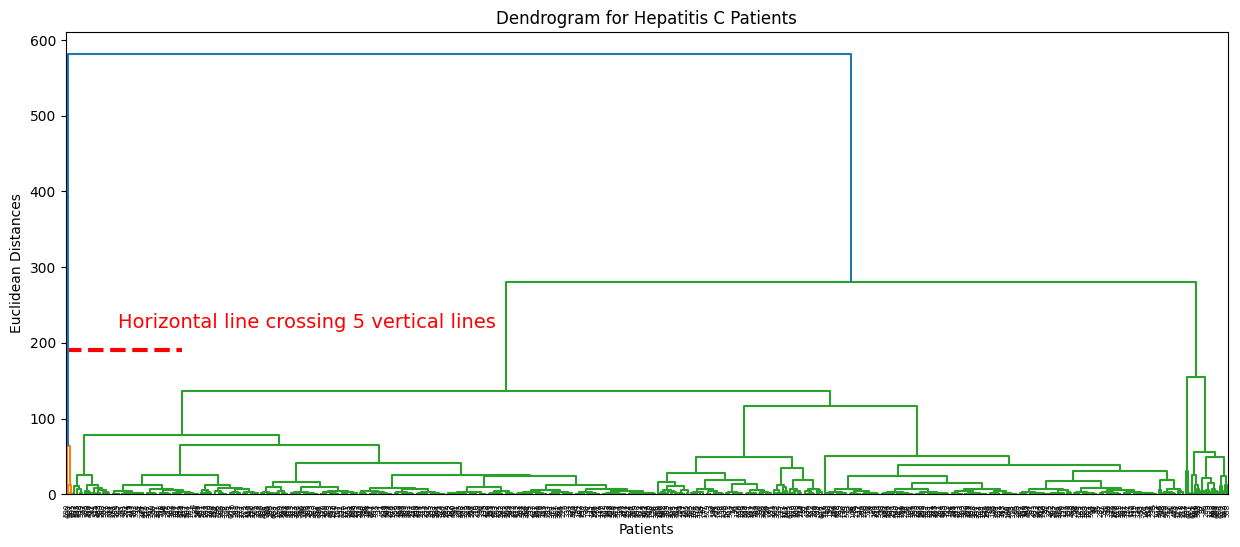

In [17]:
# Selecting ALB and BIL for clustering
X = data[['ALB', 'BIL']].values

plt.figure(figsize=(15, 6))
plt.title('Dendrogram for Hepatitis C Patients')
plt.xlabel('Patients')
plt.ylabel('Euclidean Distances')

# Dynamic horizontal line placement
plt.hlines(y=190, xmin=0, xmax=len(X), lw=3, linestyles='--', color='red')
plt.text(x=len(X) * 0.45, y=220, s='Horizontal line crossing 5 vertical lines', fontsize=14, color='red')

# Creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.show()